In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
from Util import loadBeerRaw,loadWine
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import FastICA


In [7]:
X_train, X_test, y_train, y_test= loadBeerRaw()
ica = FastICA(n_components=3,
         random_state=0)
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
icaComponents =ica.fit_transform(X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale']])

In [8]:
icaDf = pd.DataFrame(data = icaComponents
             , columns = ['ICA component 1', 'ICA component 2','ICA component 3'])

In [9]:
icaDf.head()

,ICA component 1,ICA component 2,ICA component 3
0,-0.006194,0.001694,0.000727
1,0.005874,0.004917,0.000359
2,0.000973,-0.000769,0.000410
3,0.000198,-0.006563,0.000810
4,-0.000060,-0.001419,0.000471


In [10]:
finalDf = pd.concat([icaDf, y_train], axis = 1)
finalDf.head()

,ICA component 1,ICA component 2,ICA component 3,Style
0,-0.006194,0.001694,0.000727,NaN
1,0.005874,0.004917,0.000359,Cream Ale
2,0.000973,-0.000769,0.000410,Holiday/Winter Special Spiced Beer
3,0.000198,-0.006563,0.000810,American IPA
4,-0.000060,-0.001419,0.000471,NaN


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


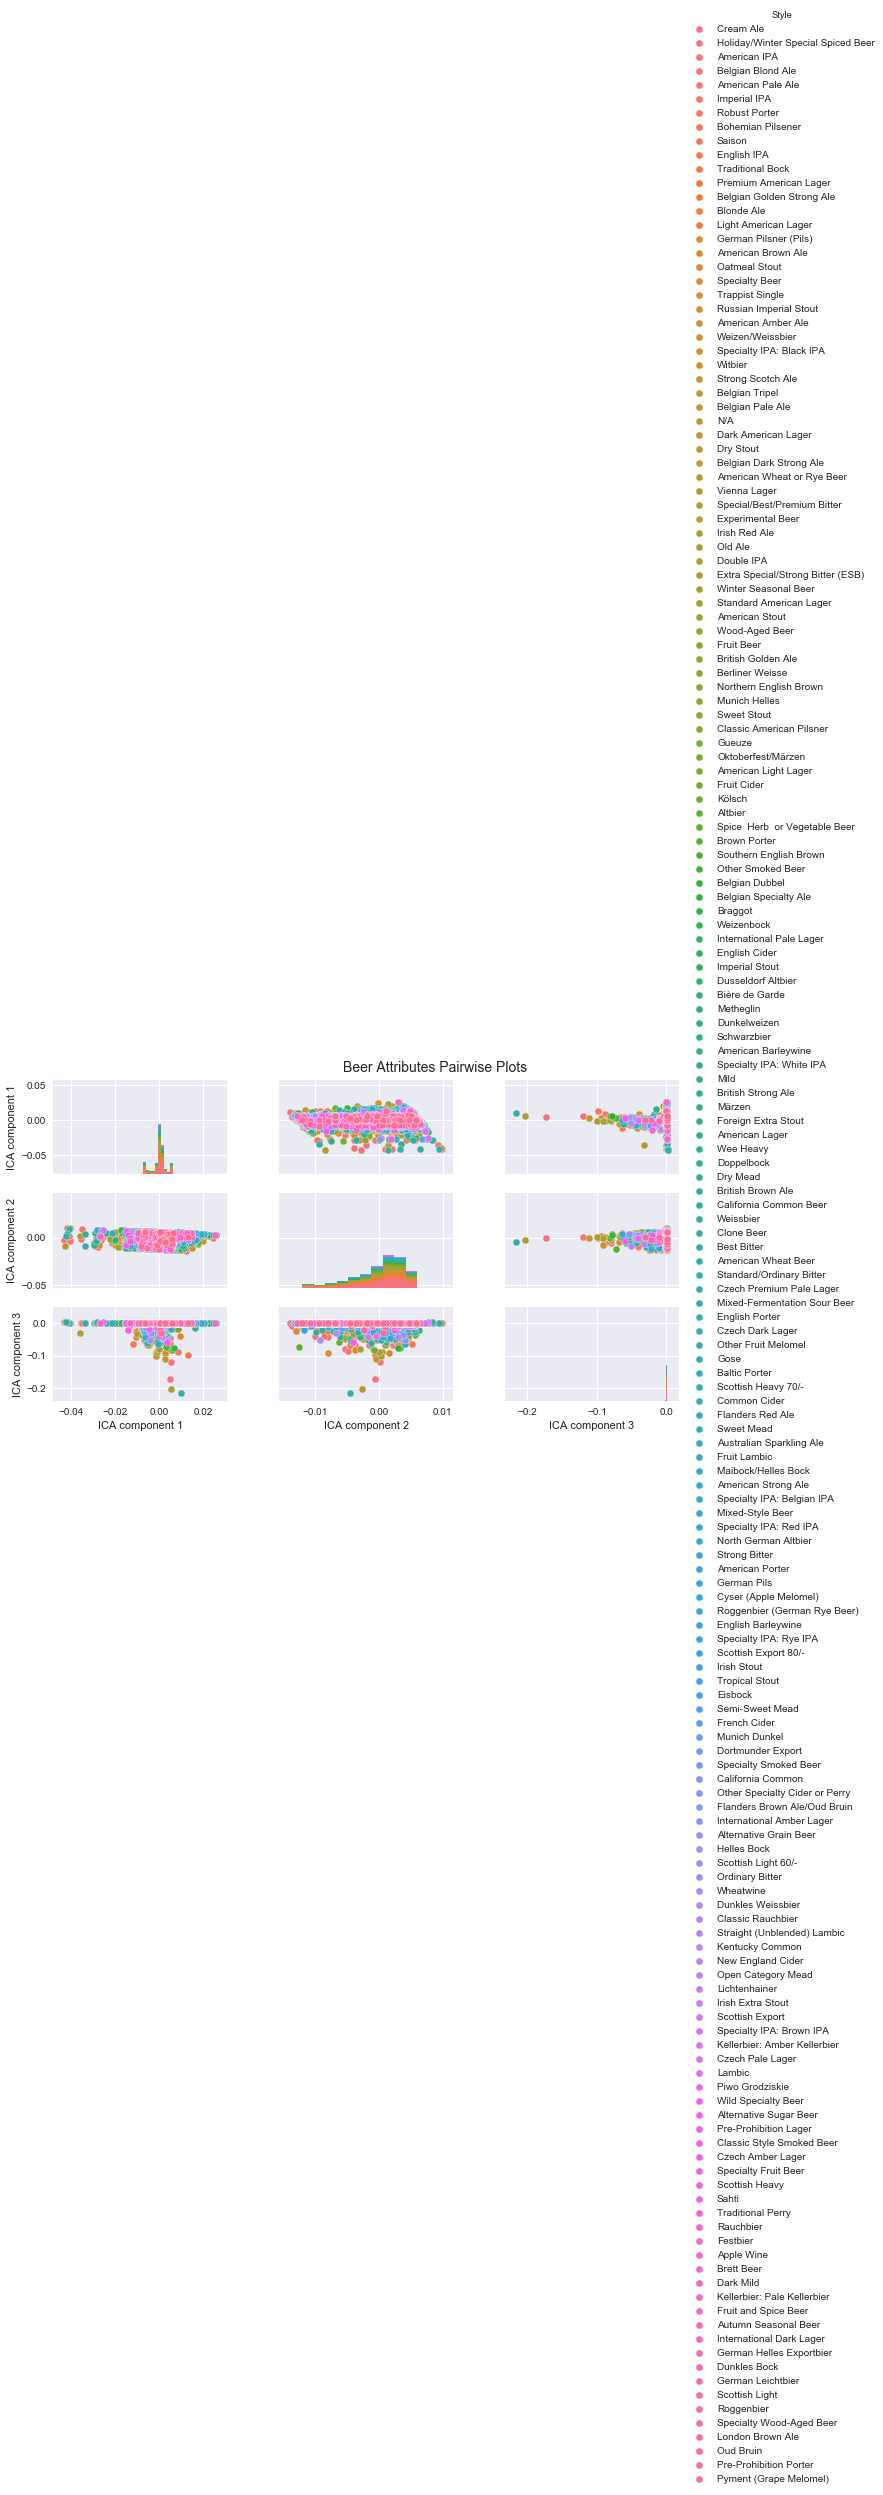

In [11]:
pp = sns.pairplot(finalDf, hue='Style', size=1.8, aspect=1.8)
fig = pp.fig 
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)